# THE SPARKS FOUNDATION : GRIP : OCTOBER 2021

# Data Science and Business Analytics Intern
# Task-1 : Prediction Using Supervised ML

# Author : Sagar Satish Shendage
## Language : Python

## Problem statement:
### Predict the percentage of an student based on the no.of study hours.
### What will be predicted score if a student studies for 9.25 hrs/day?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading data from the link using url
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

print("Data imported successfully")
student_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_data.shape

(25, 2)

In [6]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
student_data.isnull().sum()

# here we can see that no null values in the data

Hours     0
Scores    0
dtype: int64

## Visualize and Analyze the Dataset

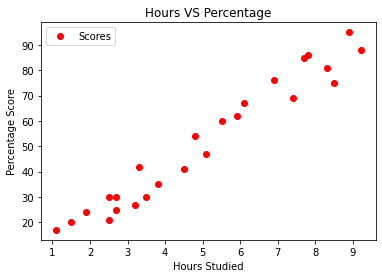

In [8]:
# plotting the distribution of scores and number of hours studied on a 2D graph
student_data.plot(x='Hours',y='Scores',style='ro')
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [7]:
# we are extracting values of hours data into variables x and the values of score y
x = student_data.iloc[:,:-1].values
y = student_data.iloc[:,1].values

In [13]:
# Number of Hours Studied
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
# Scores Obtained
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [16]:
# we now split the data into train and test datasets using scikit-learn's built-in train_test_split()
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,
                                  test_size=0.2,random_state=0)                

In [17]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [18]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [19]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [20]:
y_test

array([20, 27, 69, 30, 62])

### Design and Train the Machine Learning Model 

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete")

Training complete


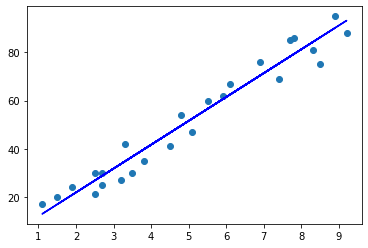

In [23]:
# plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='blue')
plt.show()

In [24]:
print(x_test)                            # testing data - in Hours
y_pred = regressor.predict(x_test)       # Predicting the Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# comparing Actual VS Predicted
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
# testing with custom data of 9.25 hrs/day
hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating the Model

In [29]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982


In [30]:
print('Max Error:',metrics.max_error(y_test,y_pred))

Max Error: 6.732260779489835


In [31]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 21.598769307217456
